O objetivo principal deste trabalho é projetar e analisar os modelos de aprendizado de
máquina criados para identificar corretamente a espécie de flor na base das características
observadas da sépala e da pétala. Durante o tempo de execução do projeto, você terá que
projetar o pré- processamento dos dados, experimentar com diferentes métodos de
classificação e avaliar o desempenho do modelo gerado.

In [1]:
# Importação de Bibliotecas necessárias ao Projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [13]:
# Classe do Projeto

class Iris():
    def __init__(self):
      self.df = None
      self.X_treinamento = None
      self.X_teste = None
      self.y_treinamento = None
      self.y_teste = None
      self.model = None
      self.accuracy = None
      self.precision = None
      self.recall = None
      self.f1_score = None
      self.confusion_matrix = None
      self.classification_report = None



    def CarregarDataset(self, path):
        """
        Carrega o conjunto de dados a partir de um arquivo CSV.

        Parâmetros:
        - path (str): Caminho para o arquivo CSV contendo o dataset.

        O dataset é carregado com as seguintes colunas: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm e Species.
        """
        names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=names)

    def TratamentoDeDados(self):
        """
        Realiza o pré-processamento dos dados carregados.

        Sugestões para o tratamento dos dados:
            * Utilize `self.df.head()` para visualizar as primeiras linhas e entender a estrutura.
            * Verifique a presença de valores ausentes e faça o tratamento adequado.
            * Considere remover colunas ou linhas que não são úteis para o treinamento do modelo.

        Dicas adicionais:
            * Explore gráficos e visualizações para obter insights sobre a distribuição dos dados.
            * Certifique-se de que os dados estão limpos e prontos para serem usados no treinamento do modelo.
        """
        # Exibindo as primeiras linhas:
        print('Visualizando as primeiras linhas ...\n')
        print(self.df.head())

        # Verificando a existência de valores Nulos:
        print('\nVerificando a presença de valores ausentes ...\n')
        print(self.df.isnull().sum())

        #Verificando dados nulos:
        print('\nOlhando os dados nulos nas colunas...\n')
        for col in self.df.columns.tolist():
          print('Número de missing na coluna {}: {}'.format(col, self.df[col].isnull().sum()))

        #Verificando necessidade de remoção de colunas ou linhas:
        print('\nNão será necessário a remoção de colunas ou linhas...\n')

        #Verificando dados estatísticos do dataframe:
        print('\nObtendo uma descrição dos dados...\n')
        print(self.df.describe())

        #Verificando contagem de valores pelo atributo: Species
        print('\nObtendo uma contagem de valores...\n')
        print(self.df['Species'].value_counts())

        #Verificando correlação pelo heatmap
        print('\nOlhando correlação de colunas numéricas pelo heatmap...\n')

        hm = self.df.copy()
        hm = hm.replace("Iris-setosa", 0)
        hm = hm.replace("Iris-versicolor", 1)
        hm = hm.replace("Iris-virginica", 2)

        hm = hm.corr()

        fig, ax = plt.subplots()
        im = ax.imshow(hm, cmap='bwr')

        ax.set_xticks(np.arange(len(hm.columns)), labels=hm.columns)
        ax.set_yticks(np.arange(len(hm.columns)), labels=hm.columns)

        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        hm = hm.rename(columns={"Species": 0, "SepalLengthCm": 1, "SepalWidthCm": 2, "PetalLengthCm": 3, "PetalWidthCm": 4})

        for i in hm:
            for j in hm:
                text = ax.text(j, i, round(hm[i][j], 2), ha="center", va="center", color="black")
        plt.show()

        #Verificando a distribuição de Sepal Length pelo BloxPlot
        print('\nOlhando a distribuição de Sepal Length pelo BloxPlot...\n')

        plt.figure(figsize=(15,8))
        sns.boxplot(x='Species',y='SepalLengthCm',data=self.df.sort_values('SepalLengthCm',ascending=False))
        plt.show()

        #Verificando a relação entre Species e Sepal Width
        print('\nAnálise de dados entre Species e Sepal Length x Width...\n')

        fig = self.df[self.df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
        self.df[self.df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='cyan', label='versicolor',ax=fig)
        self.df[self.df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='black', label='virginica', ax=fig)
        fig.set_xlabel("Sepal Length")
        fig.set_ylabel("Sepal Width")
        fig.set_title("Sepal Length x Width")
        fig=plt.gcf()
        fig.set_size_inches(10,6)
        plt.show()

        #Verificando a relação entre Species e Sepal Width
        print('\nAnálise de dados: entre Species e Petal Length x Width...\n')

        fig = self.df[self.df.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
        self.df[self.df.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
        self.df[self.df.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
        fig.set_xlabel("Petal Length")
        fig.set_ylabel("Petal Width")
        fig.set_title("Petal Length x Width")
        fig=plt.gcf()
        fig.set_size_inches(10,6)
        plt.show()

    def Treinamento_SVM(self):
        """
        Treina o modelo de machine learning.

        Detalhes:
            * Utilize a função `train_test_split` para dividir os dados em treinamento e teste.
            * Escolha o modelo de machine learning que queira usar. Lembrando que não precisa ser SMV e Regressão linear.
            * Experimente técnicas de validação cruzada (cross-validation) para melhorar a acurácia final.

        Nota: Esta função deve ser ajustada conforme o modelo escolhido.
        """
        # Dividindo os dados principais em treinamento and teste: 70% (treinamento) e 30% (testes)

        treinamento, teste = train_test_split(self.df, test_size = 0.3)
        print(treinamento.shape)
        print(teste.shape)

        self.X_treinamento = treinamento[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
        self.y_treinamento = treinamento.Species

        self.X_teste = teste[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
        self.y_teste = teste.Species

        print(f'Verificando Datasets\nTreinamento: \n{self.X_treinamento.head(5)}\n\nTestes: \n{self.X_teste.head(5)}\n\nSaida:\n {self.y_treinamento.head()}')

        # SVM
        print('\nTREINANDO COM O SVM - SUPORT VECTOR MACHINE\n')

        self.model = svm.SVC()
        self.model.fit(self.X_treinamento, self.y_treinamento)  # Treina o modelo com os dados de treinamemto




    def Teste_SVM(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.

        Esta função deve ser implementada para testar o modelo e calcular métricas de avaliação relevantes,
        como acurácia, precisão, ou outras métricas apropriadas ao tipo de problema.
        """
        prediction = self.model.predict(self.X_teste)             # Testa o modelo com predição
        self.accuracy = metrics.accuracy_score(prediction, self.y_teste)
        self.precision = metrics.precision_score(prediction, self.y_teste, average='weighted')
        self.recall = metrics.recall_score(prediction, self.y_teste, average='weighted')
        self.f1_score = metrics.f1_score(prediction, self.y_teste, average='weighted')
        self.confusion_matrix = metrics.confusion_matrix(prediction, self.y_teste)
        self.classification_report = classification_report(self.y_teste, prediction)

        print('\n TESTE DO MODELO SVM - SUPORT VECTOR MACHINE\n')

        print('Predição:')
        print(prediction)
        print('\n')

        print('Matriz de Confusão:')
        print(self.confusion_matrix)
        print('\n')
        print(f'A acurácia do modelo SVM.SVC é de: {round(100*self.accuracy, 2)}%')
        print(f'A precisão do modelo SVM.SVC é de: {round(100*self.precision, 2)}%')
        print(f'O Recall   do modelo SVM.SVC é de {round(100*self.recall, 2)}%')
        print(f'O F1 Score do modelo SVM.SVC é de {round(100*self.f1_score, 2)}%')
        print(f'\n\nRelatório de Classificação: \n {self.classification_report}')

    def Treinamento_LinearRegression(self):
        """
        Treina o modelo de machine learning.

        Detalhes:
            * Utilize a função `train_test_split` para dividir os dados em treinamento e teste.
            * Escolha o modelo de machine learning que queira usar. Lembrando que não precisa ser SMV e Regressão linear.
            * Experimente técnicas de validação cruzada (cross-validation) para melhorar a acurácia final.

        Nota: Esta função deve ser ajustada conforme o modelo escolhido.
        """
        # Dividindo os dados principais em treinamento and teste: 70% (treinamento) e 30% (testes)

        iris_data = self.df.copy()

        # Selecionando uma Espécie de Flor = Iris-versicolor
        data = iris_data[iris_data['Species'] == 'Iris-versicolor'].copy()
        data.drop(columns=['Species','SepalLengthCm','SepalWidthCm'],inplace=True)
        print('Dados selecionados')
        print(f'data: \n{data.head(20)}')


        # Plotando o Dataframe nomeado data tendo o eixo x como 'PetalLengthCm', eixo y como 'PetalWidthCm' e kind='scatter'
        data.plot(x='PetalLengthCm', y='PetalWidthCm', kind='scatter')
        plt.xlabel('Petal Length')
        plt.ylabel('Petal Width')
        plt.title('Gráfico Scatter de Petal: Length x Petal Width')
        plt.show()

        # Agora dividiremos o conjunto de dados em conjuntos de dados de treinamento e teste em (X_treinamento, y_treinamento) e (X_teste,Y_teste)

        X=data['PetalLengthCm'].values.reshape(-1,1)
        Y=data['PetalWidthCm'].values.reshape(-1,1)

        self.X_treinamento, self.X_teste, self.y_treinamento, self.y_teste=train_test_split(X,Y, test_size=0.30,random_state=1)


        # Plotting training datasets
        plt.scatter(self.X_treinamento, self.y_treinamento)
        plt.xlabel('X Treinamento')
        plt.ylabel('Y Treinamento')
        plt.title('Gráfico Scatter do Dataset de Treinamento')
        plt.show()


        # LinearRegression
        print('\nTREINANDO COM O REGRESSÃO LINEAR\n')

        self.model = LinearRegression()
        self.model.fit(self.X_treinamento, self.y_treinamento)  # Treina o modelo com os dados de treinamemto




    def Teste_LinearRegression(self):
        """
        Avalia o desempenho do modelo treinado nos dados de teste.

        Esta função deve ser implementada para testar o modelo e calcular métricas de avaliação relevantes,
        como acurácia, precisão, ou outras métricas apropriadas ao tipo de problema.
        """
        prediction = self.model.predict(self.X_teste)             # Testa o modelo com predição


        print('\n TESTE DO MODELO - REGRESSÃO LINEAR\n')

        # Mostrando o Intercept and Coefficient
        print("Intercept:", self.model.intercept_)
        print("Coefficient:", self.model.coef_)

        print('Predição:')
        print(prediction)
        print('\n\n')

        # Plotando Datasets de Teste
        plt.scatter(self.X_teste, self.y_teste)
        plt.xlabel('X Teste')
        plt.ylabel('Y Teste')
        plt.title('Gráfico Scatter de Dataset de Teste')
        plt.show()


    def Train(self):
        """
        Função principal para o fluxo de treinamento do modelo.

        Este método encapsula as etapas de carregamento de dados, pré-processamento e treinamento do modelo.
        Sua tarefa é garantir que os métodos `CarregarDataset`, `TratamentoDeDados` e `Treinamento` estejam implementados corretamente.

        Notas:
            * O dataset padrão é "iris.data", mas o caminho pode ser ajustado.
            * Caso esteja executando fora do Colab e enfrente problemas com o path, use a biblioteca `os` para gerenciar caminhos de arquivos.
        """
        self.CarregarDataset("https://raw.githubusercontent.com/MarcusMacedo1510/curso-python-data-imc/refs/heads/main/iris.data")  # Carrega o dataset especificado.

        # Tratamento de dados opcional, pode ser comentado se não for necessário
        self.TratamentoDeDados()

        self.Treinamento_SVM()               # Executa o treinamento do modelo SVM
        self.Teste_SVM()                     # Executa o teste do modelo SVM
        self.Treinamento_LinearRegression()  # Executa o treinamento do modelo LinearRegression
        self.Teste_LinearRegression()        # Executa o teste do modelo LinearRegression

# Lembre-se de instanciar as classes após definir suas funcionalidades
# Recomenda-se criar ao menos dois modelos (e.g., Regressão Linear e SVM) para comparar o desempenho.
# A biblioteca já importa LinearRegression e SVC, mas outras escolhas de modelo são permitidas.





Visualizando as primeiras linhas ...

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Verificando a presença de valores ausentes ...

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Olhando os dados nulos nas colunas...

Número de missing na coluna SepalLengthCm: 0
Número de missing na coluna SepalWidthCm: 0
Número de missing na coluna PetalLengthCm: 0
Número de missing na coluna PetalWidthCm: 0
Número de missing na coluna Species: 0

Não será necessário a remoção de colunas ou linhas...


Obtendo uma descrição dos dados...

       SepalLengt

<ipython-input-13-2921e2b4a7fb>:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hm = hm.replace("Iris-virginica", 2)
<ipython-input-13-2921e2b4a7fb>:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, round(hm[i][j], 2), ha="center", va="center", color="black")


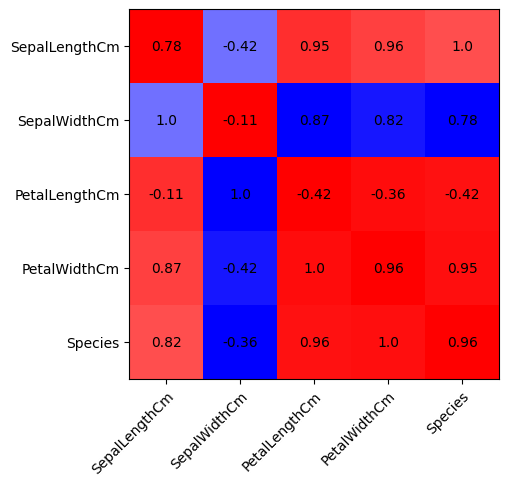


Olhando a distribuição de Sepal Length pelo BloxPlot...



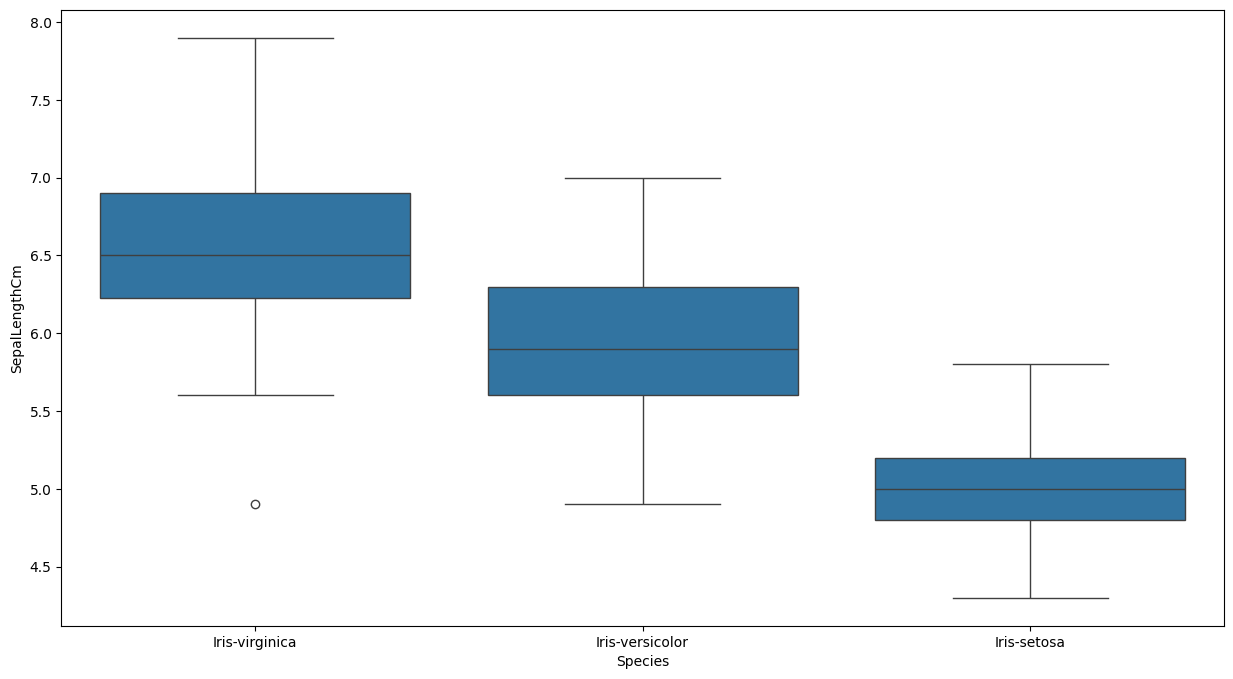


Análise de dados entre Species e Sepal Length x Width...



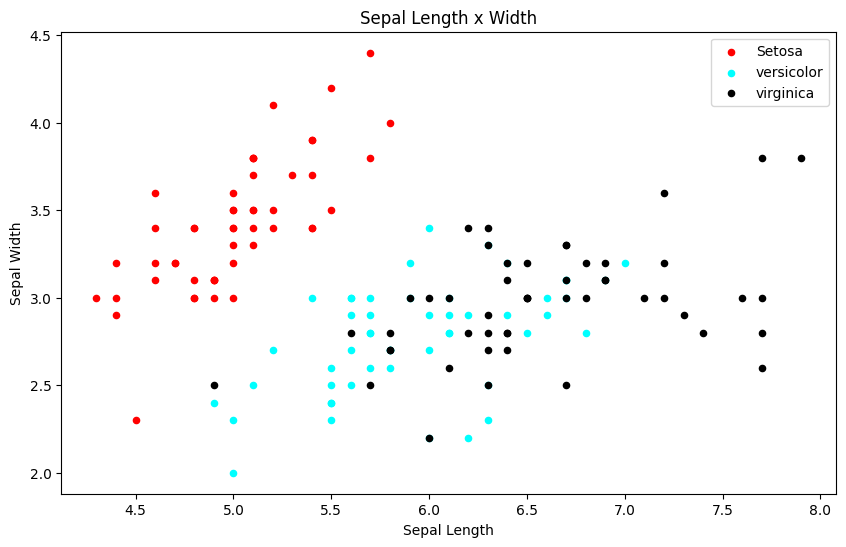


Análise de dados: entre Species e Petal Length x Width...



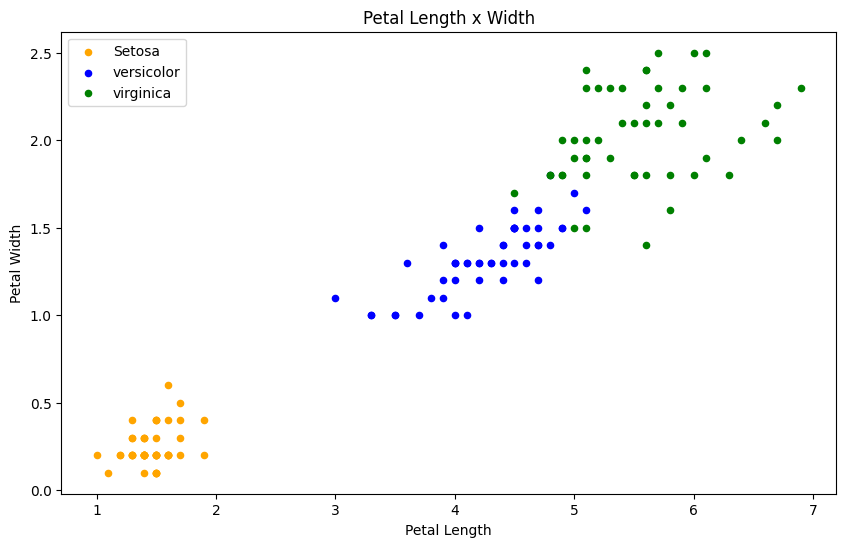

(105, 5)
(45, 5)
Verificando Datasets
Treinamento: 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
88             5.6           3.0            4.1           1.3
126            6.2           2.8            4.8           1.8
22             4.6           3.6            1.0           0.2
15             5.7           4.4            1.5           0.4
55             5.7           2.8            4.5           1.3

Testes: 
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
75             6.6           3.0            4.4           1.4
39             5.1           3.4            1.5           0.2
140            6.7           3.1            5.6           2.4
24             4.8           3.4            1.9           0.2
135            7.7           3.0            6.1           2.3

Saida:
 88     Iris-versicolor
126     Iris-virginica
22         Iris-setosa
15         Iris-setosa
55     Iris-versicolor
Name: Species, dtype: object

TREINANDO COM O SVM - SUPORT VECTOR MACH

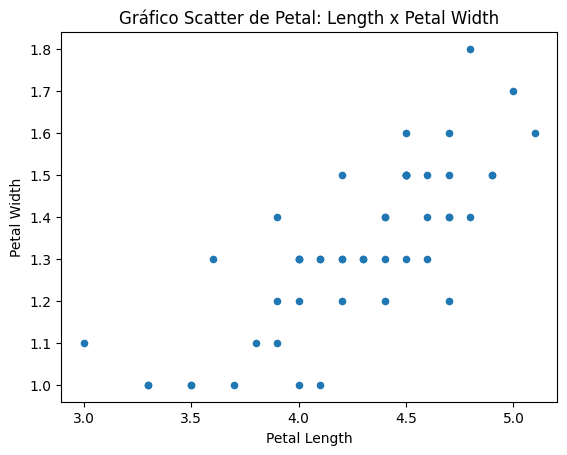

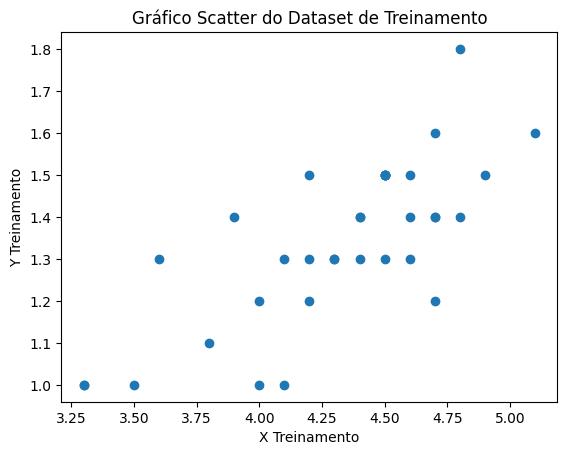


TREINANDO COM O REGRESSÃO LINEAR


 TESTE DO MODELO - REGRESSÃO LINEAR

Intercept: [-0.1044335]
Coefficient: [[0.33435961]]
Predição:
[[1.56736453]
 [1.40018473]
 [1.36674877]
 [1.26644089]
 [1.53392857]
 [1.23300493]
 [0.89864532]
 [1.06582512]
 [1.29987685]
 [1.13269704]
 [1.19956897]
 [1.23300493]
 [1.23300493]
 [1.46705665]
 [1.19956897]]





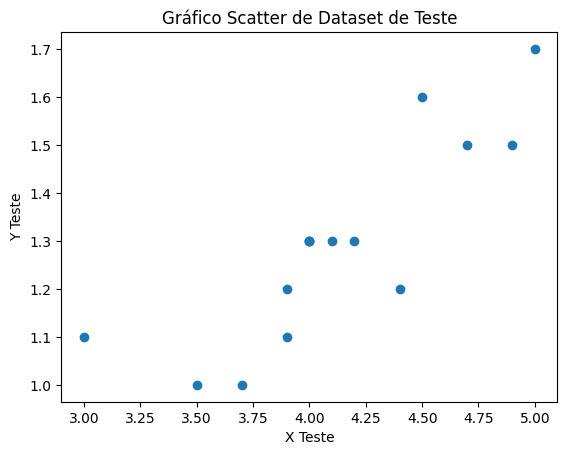

In [14]:
# Programa principal
cl = Iris()
cl.Train()